I will be using multiple linear regression on this preinitiated dataset imported from sklearn

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes

In [4]:
x,y = load_diabetes(return_X_y=True)

In [7]:
x, x.shape

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 (442, 10))

In [8]:
y,y.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

Using Sklearn's Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
x_train.shape,x_test.shape

((353, 10), (89, 10))

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# So my r2score is almost 44%

0.4399338661568968

In [26]:
print(reg.coef_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


These are the values from beta 1 to beta 10, called coefficients

In [27]:
print(reg.intercept_)

151.88331005254167


This is the value of Beta-not. which is called intercept

Now i will make the mulriple linear regression class/code from scratch

In [30]:
class LR:
  def __init__(self):
    self.coef = None
    self.intercept = None

  def fit(self,x_train,y_train):
    x_train = np.insert(x_train,0,1,axis=1) # this will insert a 1 column in the beginning.
    # calculating the coefficent
    betas = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
    self.intercept = betas[0] # 0th element is beta not
    self.coef = betas[1:] # 1 onwards is the beta 1 - beta 10. i.e coefficients

  def predict(self,x_test):
    y_pred = np.dot(x_test,self.coef) + self.intercept
    return y_pred

i did this in this class:
1. inserted a 1 column in the beginning of the matrix
2. then i caluclated the betas using inverse function of np.linalg (linear algebra)
3. since intercept is the first value, i did [0] which will take the first value. and since every other beta is coefficent, so i did [1:]
4. then i just made predict function which will predict the desired output.

In [31]:
lr = LR()

In [32]:
lr.fit(x_train,y_train)

In [34]:
y_pred = lr.predict(x_test)

In [39]:
#  calculating my own scratch code r2 score:
r2_score(y_test,y_pred)

0.43993386615689634

In [40]:
# r2 score is the same as before, now ill calculatte the betas
lr.intercept, lr.coef

(np.float64(151.88331005254165),
 array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]))

So everything is the same as before. lets make a graoh for these values

Text(0.5, 0, 'BETAS')

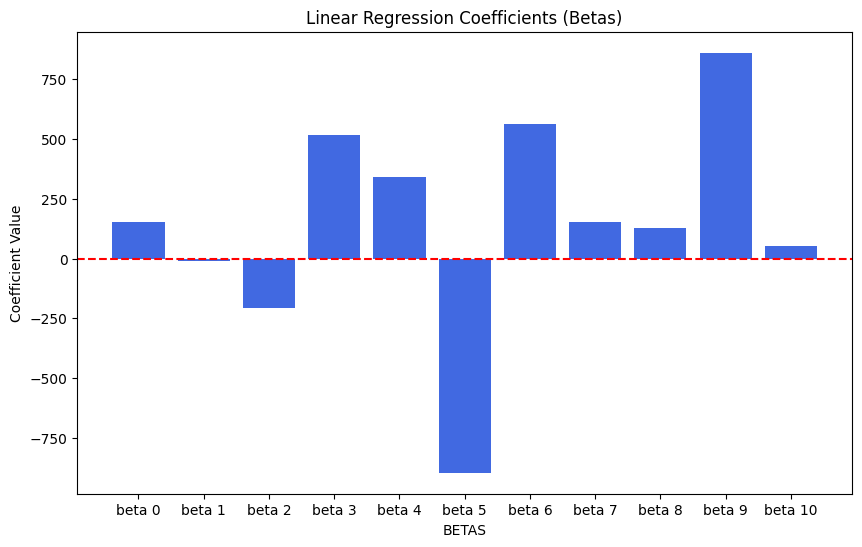

In [55]:
coeff = np.array([
    151.88331005254165,
    -9.15865318,
    -205.45432163,
    516.69374454,
    340.61999905,
    -895.5520019,
    561.22067904,
    153.89310954,
    126.73139688,
    861.12700152,
    52.42112238
])
betas = [f'beta {i}' for i in range(len(coeff))]

plt.figure(figsize=(10, 6))
plt.bar(betas, coeff, color='royalblue')
plt.axhline(0, color='red', linestyle='--') #zero line
plt.title('Linear Regression Coefficients (Betas)')
plt.ylabel('Coefficient Value')
plt.xlabel('BETAS')
